##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs) - Exercise 

### Objective

In this exercise, you will:

1. **Load the Fashion MNIST dataset** from the [Keras dataset](https://keras.io/api/datasets/) website.
2. **Preprocess the data** for training.
3. **Build your own CNN architecture** and evaluate the model.

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Number of unique classes
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Number of classes: 10


In [3]:
# Define class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

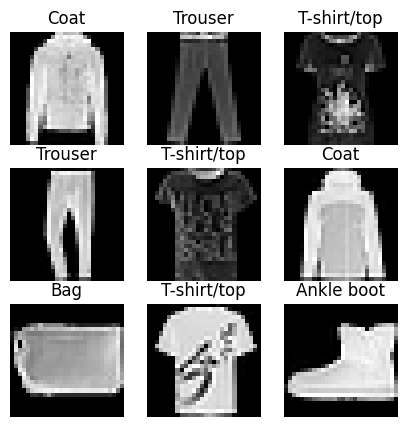

In [8]:
# Plot a 3x3 grid of random images from the dataset with their labels
plt.figure(figsize=(5, 5))
for i in range(9):
    index = np.random.randint(0, len(x_train))
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(class_names[y_train[index]])
    plt.axis("off")
plt.show()

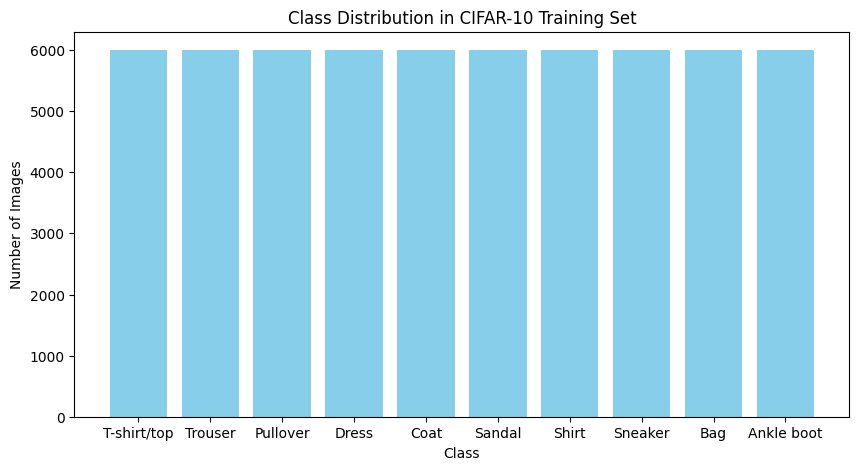

In [9]:
# Count occurrences of each class in the training set
class_counts = np.bincount(y_train.flatten())

# Plot the class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts, color='skyblue')
plt.title("Class Distribution in CIFAR-10 Training Set")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

### Build your Image Classification Model
Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Normalize pixel values for x_train and x_test
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 


# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build a CNN model
model = Sequential([
    Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes in fashion_mnist
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')


/opt/anaconda3/envs/cv_lab/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - accuracy: 0.8239 - loss: 0.4892
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.8821 - loss: 0.3223
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.8980 - loss: 0.2781
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 40ms/step - accuracy: 0.9093 - loss: 0.2454
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - accuracy: 0.9178 - loss: 0.2213
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 37ms/step - accuracy: 0.9265 - loss: 0.1996
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.9332 - loss: 0.1803
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.9398 - loss: 0.1605
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 32ms/step - accuracy: 0.9469 - loss: 0.1423
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9505 - loss: 0.1311
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9119 - loss: 0.2588
Test accuracy: 0.911899983882904
